# Evaluate GANs 
evaluate GANS wich generates sensor data for action "standin" (act_id=0)

In [1]:
cd ../..

/Users/hao/workspace/hpi_de/4th_Semester/Applied Machine Learning/sensor-data-gans


In [2]:
import pandas as pd
from gans.gan_evaluator import GanEvaluator
import seaborn as sns

# CNN

## load best model for action "standing"

In [29]:
cnn_model_file = './out/cnn/act_id-0/2020-08-09 23:51:35.153103_ld-64_ks-3/generator_0_tf1-0.9961365099806826_vf1-0.9739524348810872.keras'
act_id = 0

In [30]:
cnn_gan_evalator = GanEvaluator(generator_file=cnn_model_file, act_id=act_id)

## load data

In [5]:
train_path = './datasets/mydata/train_df.h5'
test_path = './datasets/mydata/test_df.h5'

window_size = 5*50
step_size = int(window_size/2)
method ='sliding'
col_names = ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'userAcceleration.c']
input_cols_train=['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']
input_cols_eval=['userAcceleration.c']

In [6]:
cnn_gan_evalator.init_data(train_path=train_path,
                      test_path=test_path,
                      window_size=window_size,
                      step_size=step_size,
                      method=method,
                      col_names=col_names,
                      input_cols_train=input_cols_train,
                      input_cols_eval=input_cols_eval
                     )

Load Data...
Transform Data...
Calculate origin performance...
Original training acc:  0.711872826626925
Original training f1_score for act_id  0 :  0.7480657640232108 

Original test acc:  0.6947040498442367
Original test f1_score for act_id  0 :  0.8100502512562814 

Done!


## evaluate impact of different amount of generated data added to original dataset

In [7]:
percentages = [0.1, 0.2, 0.3, 0.4, 0.5]

In [8]:
cnn_data = []
cnn_data.append(
        {
            'percentage': 0.0,
            'num_gen': 0,
            'train_f1': cnn_gan_evalator.orig_train_f1_score,
            'delta_train_f1': 0,
            'test_f1': cnn_gan_evalator.orig_test_f1_score,
            'delta_test_f1': 0
        }
    )

for percentage in percentages:
    x_train_gen, y_train_gen, num_gen = cnn_gan_evalator.generate_data(percentage=percentage)
    
    gen_train_f1_score, gen_test_f1_score = cnn_gan_evalator.eval_performance(x_train_gen, y_train_gen)
    
    cnn_data.append(
        {
            'percentage': percentage,
            'num_gen': num_gen,
            'train_f1': gen_train_f1_score,
            'delta_train_f1': gen_train_f1_score - cnn_gan_evalator.orig_train_f1_score,
            'test_f1': gen_test_f1_score,
            'delta_test_f1': gen_test_f1_score - cnn_gan_evalator.orig_test_f1_score
        }
    )

In [9]:
cnn_df = pd.DataFrame(cnn_data)
cnn_df['action'] = "standing"
# cnn_df.to_hdf('standing.h5', key='standing')

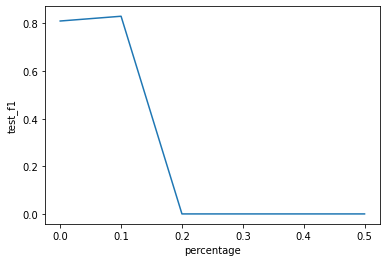

In [10]:
sns.lineplot(x='percentage', y='test_f1', data=cnn_df)

## Plot Data

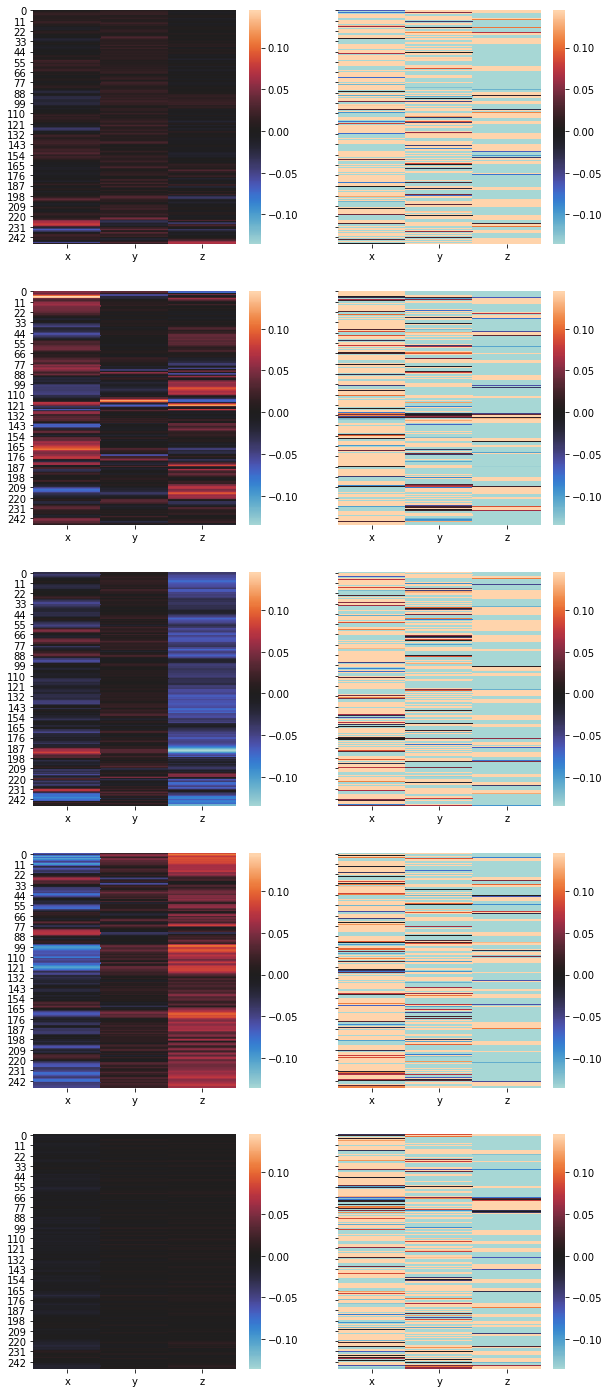

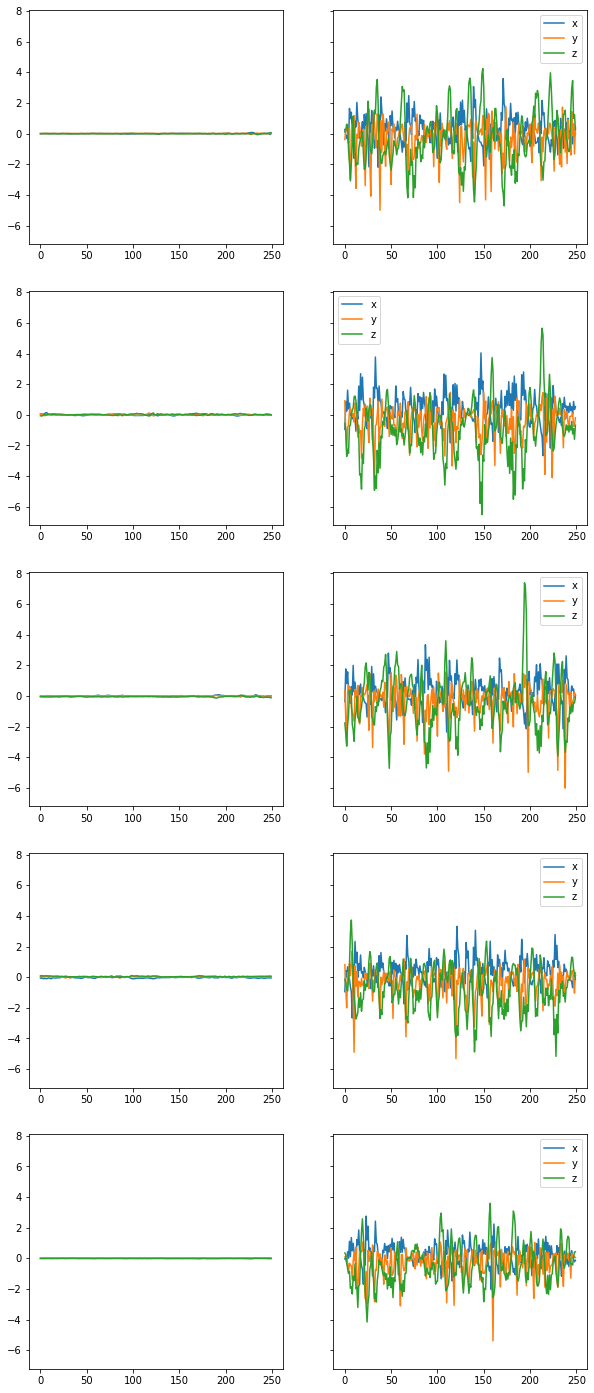

In [11]:
hm = cnn_gan_evalator.plot_heat_maps(5, random_state=42)
lp = cnn_gan_evalator.plot_line_plot(5, random_state=42)

hm.savefig('cnn_standing_heatmap.png', bbox_inches='tight')
lp.savefig('cnn_standing_linplot.png', bbox_inches='tight')

In [12]:
cnn_gan_evalator.train_classification_report()

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      1547
         1.0       0.90      0.60      0.72      1810
         2.0       0.99      0.83      0.90       669

    accuracy                           0.79      4026
   macro avg       0.86      0.81      0.81      4026
weighted avg       0.83      0.79      0.78      4026



In [13]:
cnn_gan_evalator.test_classification_report()

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       403
         1.0       0.80      0.41      0.54       387
         2.0       0.68      0.76      0.72       173

    accuracy                           0.72       963
   macro avg       0.73      0.72      0.70       963
weighted avg       0.74      0.72      0.69       963



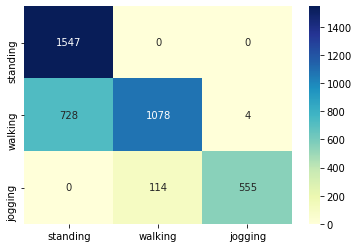

In [14]:
cnn_gan_evalator.train_cm()

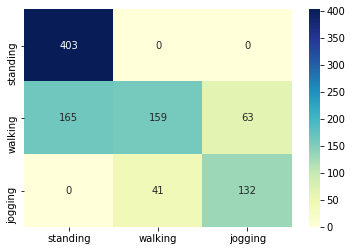

In [15]:
cnn_gan_evalator.test_cm()

# LSTM

## load best model for action "standing"

In [27]:
lstm_model_file = './out/lstm/act_id-0/2020-08-10 08:02:14.525671_ld-256_small-True/generator_0_tf1-0.9511220411927452_vf1-0.9024134312696748.keras'
act_id = 0

In [28]:
lstm_gan_evalator = GanEvaluator(generator_file=lstm_model_file, act_id=act_id)

## load data

In [18]:
lstm_gan_evalator.init_data(train_path=train_path,
                      test_path=test_path,
                      window_size=window_size,
                      step_size=step_size,
                      method=method,
                      col_names=col_names,
                      input_cols_train=input_cols_train,
                      input_cols_eval=input_cols_eval
                     )

Load Data...
Transform Data...
Calculate origin performance...
Original training acc:  0.711872826626925
Original training f1_score for act_id  0 :  0.7480657640232108 

Original test acc:  0.6947040498442367
Original test f1_score for act_id  0 :  0.8100502512562814 

Done!


In [19]:
lstm_data = []
lstm_data.append(
        {
            'percentage': 0.0,
            'num_gen': 0,
            'train_f1': lstm_gan_evalator.orig_train_f1_score,
            'delta_train_f1': 0,
            'test_f1': lstm_gan_evalator.orig_test_f1_score,
            'delta_test_f1': 0
        }
    )

for percentage in percentages:
    x_train_gen, y_train_gen, num_gen = lstm_gan_evalator.generate_data(percentage=percentage)
    
    gen_train_f1_score, gen_test_f1_score = lstm_gan_evalator.eval_performance(x_train_gen, y_train_gen)
    
    lstm_data.append(
        {
            'percentage': percentage,
            'num_gen': num_gen,
            'train_f1': gen_train_f1_score,
            'delta_train_f1': gen_train_f1_score - lstm_gan_evalator.orig_train_f1_score,
            'test_f1': gen_test_f1_score,
            'delta_test_f1': gen_test_f1_score - lstm_gan_evalator.orig_test_f1_score
        }
    )

In [20]:
lstm_df = pd.DataFrame(lstm_data)
lstm_df

,percentage,num_gen,train_f1,delta_train_f1,test_f1,delta_test_f1
0,0.0,0,0.748066,0.000000,0.810050,0.000000
1,0.1,155,0.865213,0.117147,0.878953,0.068903
2,0.2,310,0.921382,0.173316,0.961814,0.151764
3,0.3,465,0.995816,0.247750,0.998761,0.188711
4,0.4,619,0.997100,0.249034,0.998761,0.188711
5,0.5,774,0.000000,-0.748066,0.000000,-0.810050


## Plot Data

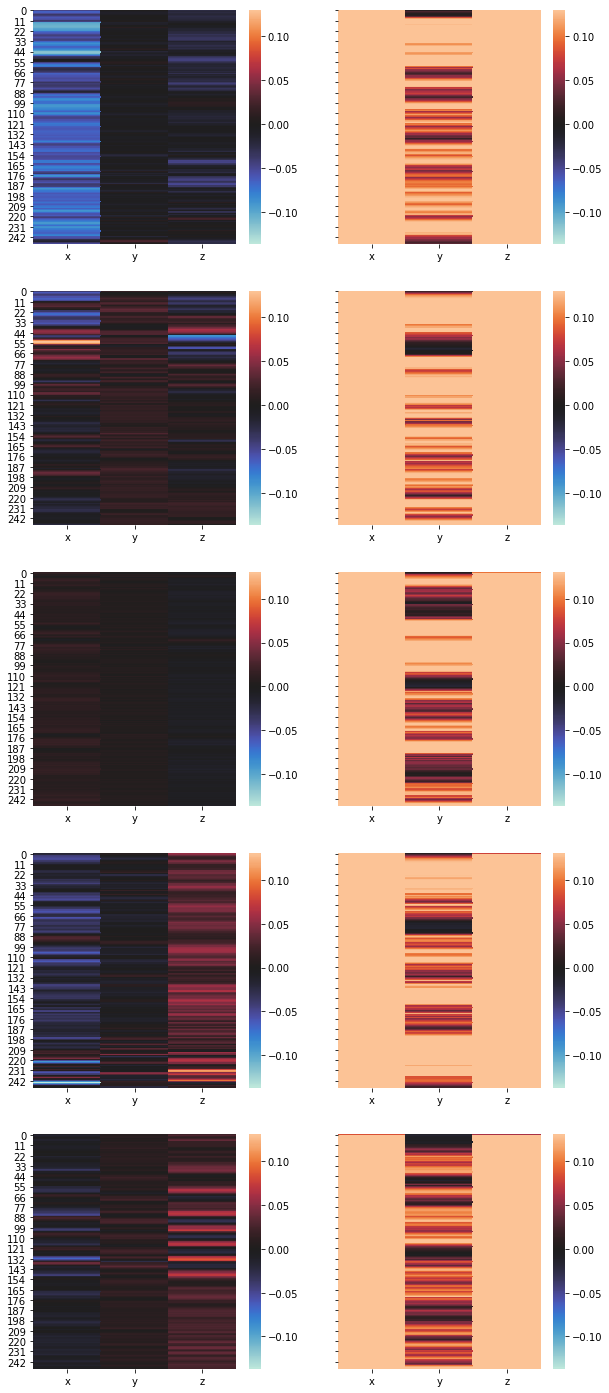

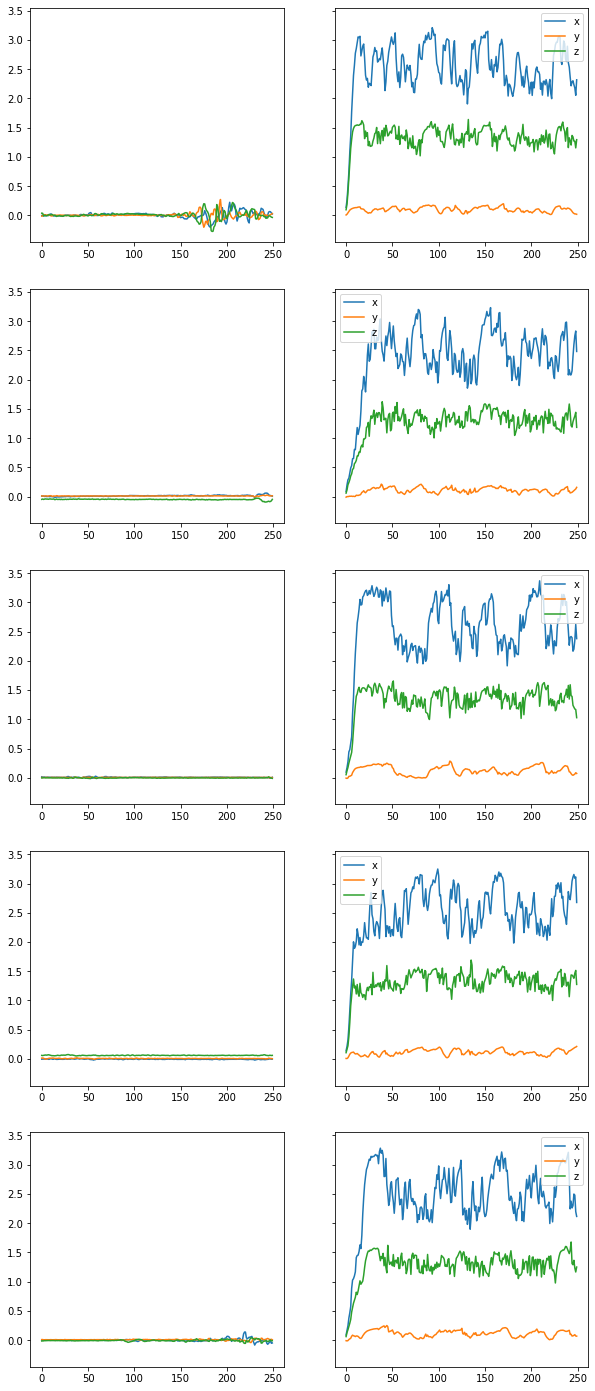

In [21]:
hm = lstm_gan_evalator.plot_heat_maps(5)
lp = lstm_gan_evalator.plot_line_plot(5)

hm.savefig('lstm_standing_heatmap.png', bbox_inches='tight')
lp.savefig('lstm_standing_linplot.png', bbox_inches='tight')

In [22]:
lstm_gan_evalator.train_classification_report()

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1547
         1.0       0.94      0.99      0.97      1810
         2.0       0.99      0.83      0.90       669

    accuracy                           0.97      4026
   macro avg       0.97      0.94      0.96      4026
weighted avg       0.97      0.97      0.97      4026



In [23]:
lstm_gan_evalator.test_classification_report()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       403
         1.0       0.89      0.82      0.86       387
         2.0       0.67      0.77      0.72       173

    accuracy                           0.89       963
   macro avg       0.85      0.87      0.86       963
weighted avg       0.90      0.89      0.89       963



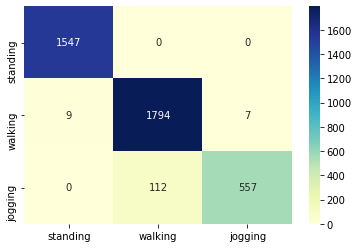

In [24]:
lstm_gan_evalator.train_cm()

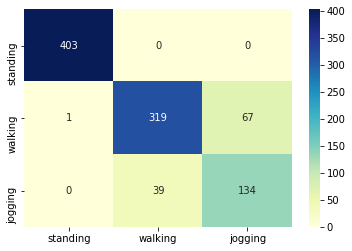

In [25]:
lstm_gan_evalator.test_cm()